<a href="https://colab.research.google.com/github/mayraberrones94/Analisis_Algoritmos/blob/master/Entrega_pia1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Descarga el conjunto de datos IRIS



In [5]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans 
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA    #algoritmo de PCA

datos=pd.read_csv('/content/drive/MyDrive/Datasets/Datos_curso/Iris.csv')
datos = datos.drop(  columns=[ "Species" , "Id" ] )
datos.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(datos)


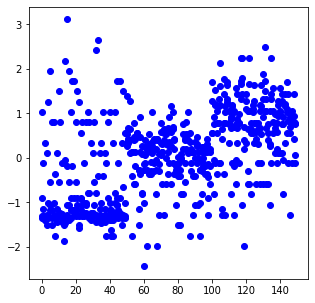

In [7]:
plt.figure(figsize=(5, 5))
plt.plot(X, 'bo');

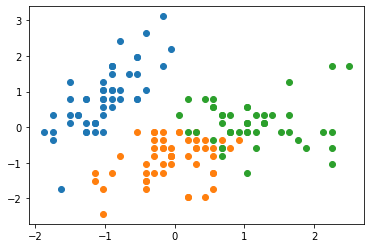

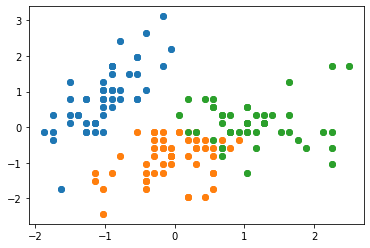

In [8]:
""" Visualize K means for each iteration """
""" create an empty list for each cluster, k is the cluster number """
k = 3
clusters = [[[0 for _ in range(2)] for _ in range(1)] for _ in range(k)]
for i in range(k):
    clusters[i].pop() #if we dont do that, additional [0,0] points will be stayed added in our data
    
""" Visualize each iteration. """
for i in range(1,3):
    kmeans = KMeans(n_clusters=k, random_state = 0, max_iter=i).fit(X)
    for index,data_point in enumerate(X):
        clusters[kmeans.labels_[index]].append(list(data_point))
        
    for i in range(k):
        clusters[i] = np.array(clusters[i])
        plt.scatter(clusters[i][:,0],clusters[i][:,1])
        clusters[i] = clusters[i].tolist() 
    plt.show()

In [9]:
kmeans = KMeans(n_clusters = 3,  max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

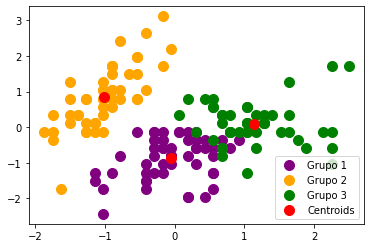

In [10]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'purple', label = 'Grupo 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'orange', label = 'Grupo 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Grupo 3')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')

plt.legend()

In [11]:

iris_data = pd.read_csv('/content/drive/MyDrive/Datasets/Datos_curso/Iris.csv')
iris_data.columns


Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [12]:
X = iris_data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y = iris_data.Species

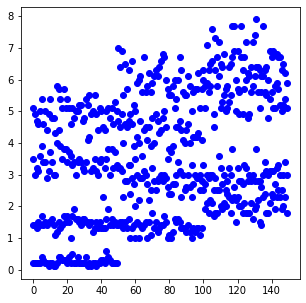

In [13]:
plt.figure(figsize=(5, 5))
plt.plot(datos, 'bo');

In [14]:
from sklearn.cluster import KMeans 
x = datos.iloc[:, [0, 1, 2, 3]].values

kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

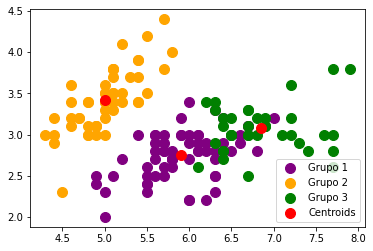

In [15]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'purple', label = 'Grupo 1')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'orange', label = 'Grupo 2')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Grupo 3')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')

plt.legend()

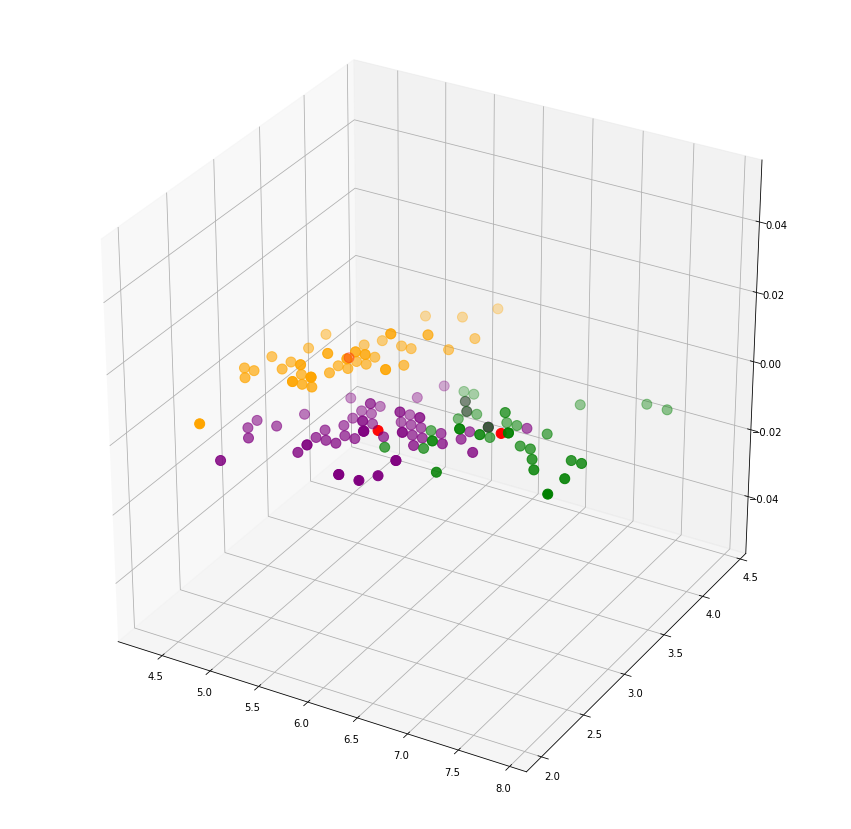

In [16]:
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')
plt.show()

In [17]:
from sklearn.cluster import KMeans as km
distancia=[]
for i in range(2, 11):
    agr = km(n_clusters= i )
    agr.fit(datos)
    distancia.append( agr.inertia_ )

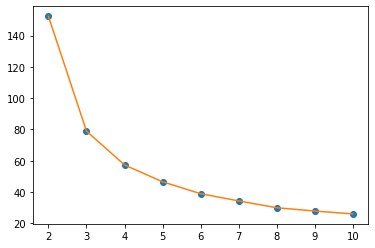

In [18]:
fig,ax=plt.subplots()
ax.plot(np.arange(2,11),distancia,marker='o',linestyle='')
ax.plot(np.arange(2,11),distancia)
plt.show()

In [24]:
agr = km(n_clusters= 3 )
agr.fit(datos)
datos['grupo']=agr.predict(datos)
datos.tail(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,grupo
140,6.7,3.1,5.6,2.4,2
141,6.9,3.1,5.1,2.3,2
142,5.8,2.7,5.1,1.9,0
143,6.8,3.2,5.9,2.3,2
144,6.7,3.3,5.7,2.5,2
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,0
147,6.5,3.0,5.2,2.0,0
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,0


In [25]:
normal = []
for i in y:
  if i == 'Iris-setosa':
    normal.append(0)
  elif i == 'Iris-versicolor':
    normal.append(1)
  else:
    normal.append(2)


print(normal)


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


In [26]:
from sklearn.metrics.cluster import normalized_mutual_info_score
normalized_mutual_info_score(datos['grupo'], normal)

0.7771535104605841